# 画像認識できるか

In [34]:
import textwrap
import os
from dotenv import load_dotenv

import google.generativeai as genai


from IPython.display import display
from IPython.display import Markdown

In [4]:
# マークダウンに変換する関数
def to_markdown(text):
    text = text.replace('•', '  *')
    return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

load_dotenv('./../.env')
GEMINI_API_KEY = os.environ['GEMINI_API_KEY']
genai.configure(api_key=GEMINI_API_KEY)

model = genai.GenerativeModel('gemini-pro-vision')

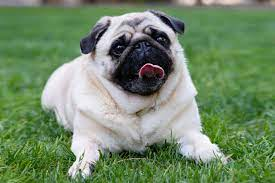

In [30]:
import PIL.Image

img = PIL.Image.open('./recognition_data/dog1.jpeg')
img

In [6]:
# シンプルに使用
response = model.generate_content(img)
to_markdown(response.text)

>  The Pug is a toy breed of dog with a distinctive wrinkled, short-muzzled face and a compact square body. The Pug is a friendly and outgoing breed that makes a great companion dog. Pugs are also known for their love of food and their tendency to be overweight.
> 
> Here are some additional facts about the Pug:
> 
> * The Pug is thought to have originated in China.
> * The Pug was brought to Europe by traders in the 16th century.
> * The Pug was a favorite dog of the royal family in England.
> * The Pug is a popular breed in the United States and other countries around the world.
> * The Pug is a small breed, with an average weight of 14 to 18 pounds.
> * The Pug has a short, double coat that comes in a variety of colors, including fawn, black, and apricot.
> * The Pug has a lifespan of 12 to 15 years.
> 
> If you are looking for a friendly, outgoing, and loving companion dog, the Pug may be the perfect breed for you.

In [ ]:
'''
パグは、特徴的なしわのある短い口輪の顔と、コンパクトな四角い体を持つ玩具犬種です。パグは友好的で外向的な犬種で、素晴らしいコンパニオン・ドッグになる。パグは食べ物が大好きで、太りやすいことでも知られています。

以下はパグに関する追加情報です：

パグの原産地は中国と考えられている。
パグは16世紀に貿易商によってヨーロッパに持ち込まれた。
パグはイギリスの王室の愛犬だった。
パグはアメリカをはじめ、世界各国で人気のある犬種である。
パグは小型犬で、平均体重は14～18ポンド。
パグの被毛は短く、ダブルコートで、フォーン、ブラック、アプリコットなど様々な色があります。
パグの寿命は12～15年です。
友好的で、外向的で、愛情深いコンパニオン・ドッグを探しているなら、パグはあなたにぴったりの犬種かもしれません。
'''

In [7]:
# data1 補助
response = model.generate_content(["犬種を教えてください。", img], stream=True)
response.resolve()
to_markdown(response.text)

>  パグです。愛玩犬として人気のある犬種です。

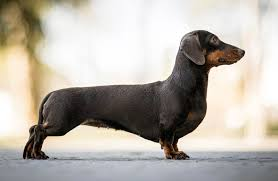

In [8]:
# data2
img = PIL.Image.open('./recognition_data/dog2.jpeg')
img

In [9]:
# data2
response = model.generate_content(img)
to_markdown(response.text)

>  A dachshund is a small breed of dog that is long and low to the ground. They have a long, narrow body with short legs and a long tail. Their ears are long and hang down, and their eyes are dark and round.

In [ ]:
'''
ダックスフンドは小型犬で、体高が低く、胴が長い。細長い胴体に短い足と長い尾がある。耳は長く垂れ下がり、目は黒く丸い。
'''

In [10]:
# data2 補助
response = model.generate_content(["犬種を教えてください。", img], stream=True)
response.resolve()
to_markdown(response.text)

>  これはダックスフントです。

In [ ]:
# data3
img = PIL.Image.open('./recognition_data/cat1.jpeg')
img

In [11]:
response = model.generate_content(img)
to_markdown(response.text)

>  This cat looks very comfortable and content. It seems to be enjoying the sun and the outdoors. The cat is also very beautiful, with its soft fur and bright eyes.

In [ ]:
'''
この猫はとても快適そうで、満足そうだ。太陽とアウトドアを楽しんでいるようだ。この猫はまた、柔らかい毛並みと明るい目がとても美しい。
'''

In [12]:
# data3 補助
response = model.generate_content(["猫の種類を教えてください。", img], stream=True)
response.resolve()
to_markdown(response.text)

>  この猫の種類は「キジトラ」です。キジトラは猫の毛色の種類であり、日本猫の約8割がこの毛色であると言われています。キジトラの毛色は、背中の色が黒や茶色、灰色などで、お腹は白色をしています。キジトラの性格は、一般的に人懐っこく、甘えん坊が多いと言われています。

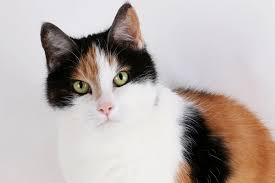

In [13]:
# data4
img = PIL.Image.open('./recognition_data/cat2.jpeg')
img

In [14]:
response = model.generate_content(img)
to_markdown(response.text)

>  A calico cat is a domestic cat with a tricolor coat. The coat is typically white with patches of orange and black. Calico cats are usually female, although male calico cats are rare. 
> 
> **Here are some interesting facts about calico cats:**
> 
> * Calico cats are often called "money cats" because they are believed to bring good luck and fortune.
> * In Japan, calico cats are considered to be a symbol of good luck and are often given as gifts.
> * Calico cats are also known for their independent and strong-willed personalities.
> * They are often very vocal and love to communicate with their owners.
> * Calico cats are typically very friendly and affectionate, and they make great pets for families with children.

In [ ]:
'''
キャリコキャットは三色の被毛を持つ家猫である。被毛は通常白で、オレンジと黒の斑がある。オスのキャリコキャットは稀だが、通常はメスである。

キャリコキャットに関する興味深い事実をいくつか紹介しよう：

キャリコ・キャットは幸運と富をもたらすと信じられているため、しばしば「マネー・キャット」と呼ばれる。
日本では、キャリーキャットは幸運の象徴とされ、しばしば贈り物として贈られる。
キャリーコ・キャットはまた、独立心が強く、意志の強い性格でも知られている。
よく声を出し、飼い主とコミュニケーションをとるのが大好きだ。
キャリコキャットは一般的にとても友好的で愛情深いので、子供のいる家庭には最適のペットである。
'''

In [15]:
# data4 補助
response = model.generate_content(["猫の種類を教えてください。", img], stream=True)
response.resolve()
to_markdown(response.text)

>  この猫の種類は「三毛猫」です。三毛猫とは、白、黒、茶色の3色からなる猫のことです。三毛猫は、メスに多く、オスはまれです。三毛猫は、幸運をもたらす猫として知られています。

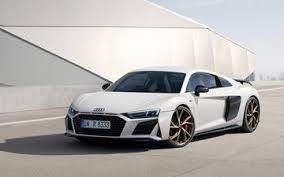

In [16]:
# data5
img = PIL.Image.open('./recognition_data/car.jpeg')
img

In [17]:
response = model.generate_content(img)
to_markdown(response.text)

>  The Audi R8 is a high-performance sports car that was first introduced in 2006. The R8 is based on the Lamborghini Huracan, and it is powered by a 5.2-liter V10 engine that produces 562 horsepower. The R8 has a top speed of 205 miles per hour, and it can accelerate from 0 to 60 miles per hour in just 3.4 seconds. The R8 is available in both coupe and convertible body styles, and it starts at a price of $144,900.

In [ ]:
'''
アウディR8は2006年に登場した高性能スポーツカーである。
R8はランボルギーニ・フラカンをベースにしており、5.2リッターV10エンジンを搭載し、562馬力を発生する。
R8の最高速度は時速205マイルで、0-60マイル加速はわずか3.4秒。
R8にはクーペとコンバーチブルのボディスタイルがあり、価格は144,900ドルから。
'''

In [18]:
# data4 補助
response = model.generate_content(["車種を教えてください。", img], stream=True)
response.resolve()
to_markdown(response.text)

>  アウディR8

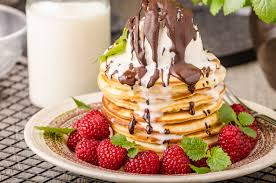

In [19]:
# data6
img = PIL.Image.open('./recognition_data/cake.jpeg')
img

In [20]:
response = model.generate_content(img)
to_markdown(response.text)

>  Ingredients:
> 
> 1 cup all-purpose flour
> 
> 2 teaspoons baking powder
> 
> 1/2 teaspoon sugar
> 
> 1/2 teaspoon salt
> 
> 1 egg
> 
> 1 cup milk
> 
> 2 tablespoons vegetable oil
> 
> Instructions:
> 
> In a large bowl, whisk together the flour, baking powder, sugar, and salt.
> 
> In a separate bowl, whisk together the egg, milk, and oil. Pour the wet ingredients into the dry ingredients and whisk until just combined.
> 
> Heat a griddle or frying pan over medium heat and brush with oil. Pour or scoop the batter onto the griddle, using approximately 1/4 cup for each pancake. Cook until bubbles form on the surface, then flip and cook until browned on the other side. Serve with butter, syrup, or your favorite toppings.

In [ ]:
'''
材料

強力粉 1カップ

ベーキングパウダー 小さじ2

砂糖 小さじ1/2

塩 小さじ1/2

卵 1個

牛乳 1カップ

植物油 大さじ2

作り方

大きなボウルに小麦粉、ベーキングパウダー、砂糖、塩を入れて泡立てる。

別のボウルに卵、牛乳、油を入れ、泡立てる。ぬれた材料を乾いた材料に入れ、泡立て器で混ぜ合わせる。

鉄板またはフライパンを中火で熱し、油を塗る。パンケーキ1枚につき約1/4カップを目安に、鉄板に生地を流し入れる。表面に気泡ができるまで焼き、裏返してもう片面に焼き色がつくまで焼く。バター、シロップ、またはお好みのトッピングを添える。
'''

In [21]:
# data6 補助
response = model.generate_content(["なんの食べ物か教えてください。", img], stream=True)
response.resolve()
to_markdown(response.text)

>  ホットケーキです。

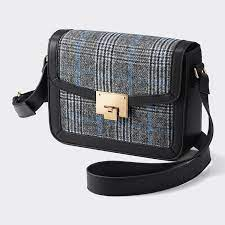

In [22]:
# data7
img = PIL.Image.open('./recognition_data/bag.jpeg')
img

In [23]:
response = model.generate_content(img)
to_markdown(response.text)

>  A black and white tweed crossbody bag with a gold clasp.

In [ ]:
'''
ゴールドの留め具が付いたブラック＆ホワイト・ツイードのクロスボディバッグ。
'''

In [24]:
# data4 補助
response = model.generate_content(["バックのブランドと商品名を教えてください。", img], stream=True)
response.resolve()
to_markdown(response.text)

>  ターゲットのA New Dayのツイードミニバッグです。

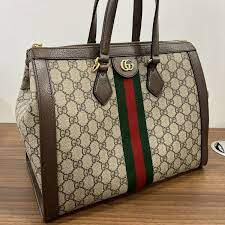

In [26]:
# 〔オフィディア〕GG ミディアム トートバッグ
img = PIL.Image.open('./recognition_data/gucci.jpeg')
img

In [27]:
response = model.generate_content(["バックのブランドと商品名を教えてください。", img], stream=True)
response.resolve()
to_markdown(response.text)

>  グッチのオフィディア トートバッグです。

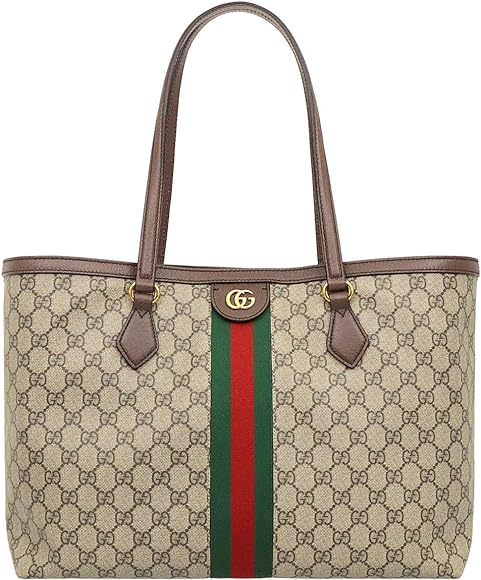

In [33]:
img = PIL.Image.open('./recognition_data/gucci2.jpg')
img

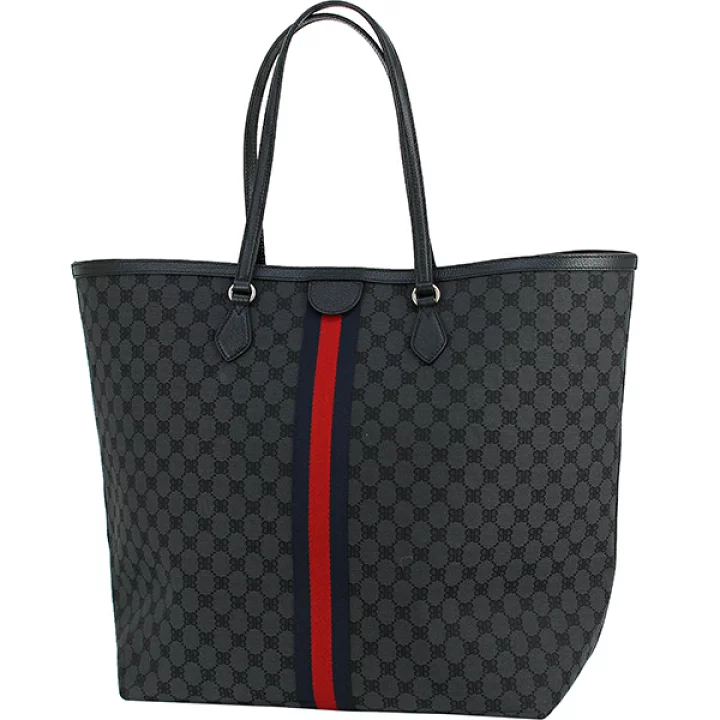

In [28]:
# バレンシアガ×グッチ
img = PIL.Image.open('./recognition_data/ga&gu.webp')
img

In [29]:
response = model.generate_content(["バックのブランドと商品名を教えてください。", img], stream=True)
response.resolve()
to_markdown(response.text)

>  グッチのトートバッグ「オフィディア」です。

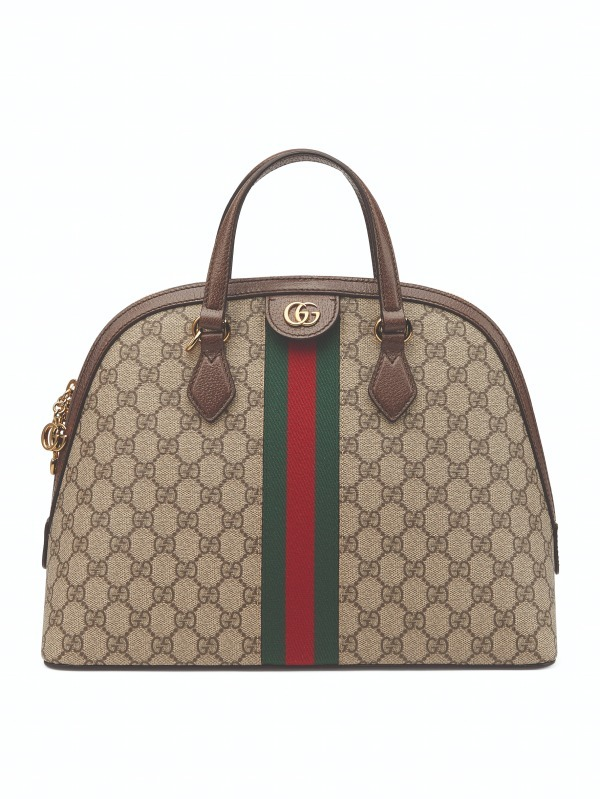

In [31]:
img = PIL.Image.open('./recognition_data/a.jpeg')
img